<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Mathematical Tools

本章介绍对金融学有用的一些数学工具，但是对每种工具的背景不做详细的介绍。这个主题有许多实用的图书，因此，本章的焦点是如何在Python中使用这些工具和技术。这些工具如下所示。
- 逼近法

回归和插值是金融学中最常用的数学技术之一。
- 凸优化

一些金融学科需要凸优化工具（例如，衍生品定价模型检验）。
- 积分

金融（衍生品）资产的估值往往归结为积分计算。
- 符号数学

Python提供SymPy。SymPy是一种强大的符号数学工具，例如，它可以解方程（组）。

## Approximation
逼近法

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [5]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)  

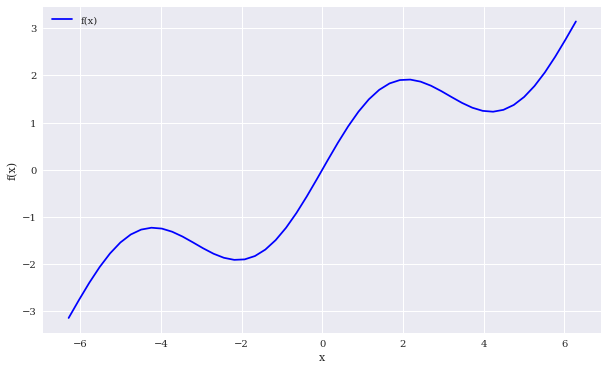

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_01.png');

### Regression

回归是相当高效的函数近似值计算工具。它不仅适用于求取一维函数的近似值，在更高维度上也很有效。得出回归结果所需要的数值化方法很容易实现，执行也很快速。

#### Monomials as Basis Functions

最简单的情况是以单项式作为基函数——也就是说，b1=1，b2=x，b3=x2，b4=x3…在这种情况下，NumPy有可以确定最优参数（np.polyfit()）和通过一组输入值求取近似值（np.polyval()）的内建函数。

In [7]:
res = np.polyfit(x, f(x), deg=1, full=True)  
# residuals, rank, singularity_values, rcond are presented if full == True
# 完整的结果：回归参数、残差、有效秩、奇异值和相对条件数

In [8]:
res  

(array([ 4.28841952e-01, -1.40254456e-16]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

In [9]:
ry = np.polyval(res[0], x)  
# 在np.polyfit()返回的最优回归相关系数ρ基础上，np.polyval (ρ,x)返回x坐标的回归值。

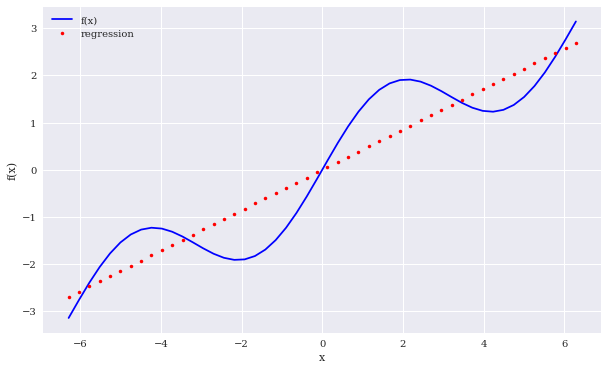

In [10]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_02.png');
# 线性回归(deg = 1)无法处理示例函数的sin部分

In [11]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
reg

array([ 1.37920761e-03, -2.46674444e-18, -6.82525072e-02,  2.67159585e-17,
        1.11425209e+00, -1.14260431e-16])

In [12]:
ry

array([-3.57707312, -2.74058791, -2.13926912, -1.73143815, -1.47954747,
       -1.34999701, -1.31295056, -1.34215217, -1.41474255, -1.51107546,
       -1.61453411, -1.71134755, -1.79040708, -1.84308265, -1.86303923,
       -1.84605324, -1.78982892, -1.69381474, -1.55901981, -1.38783025,
       -1.18382559, -0.95159519, -0.69655463, -0.4247621 , -0.14273476,
        0.14273476,  0.4247621 ,  0.69655463,  0.95159519,  1.18382559,
        1.38783025,  1.55901981,  1.69381474,  1.78982892,  1.84605324,
        1.86303923,  1.84308265,  1.79040708,  1.71134755,  1.61453411,
        1.51107546,  1.41474255,  1.34215217,  1.31295056,  1.34999701,
        1.47954747,  1.73143815,  2.13926912,  2.74058791,  3.57707312])

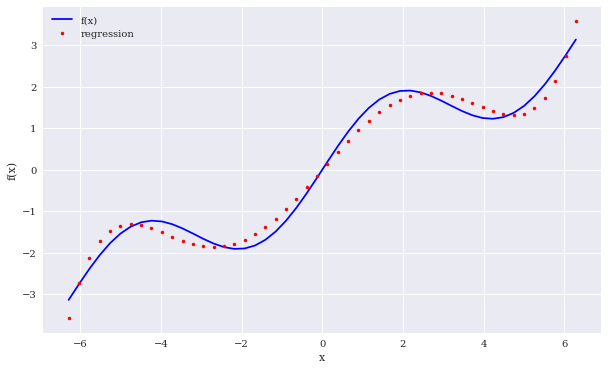

In [13]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_03.png');

In [14]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [15]:
np.allclose(f(x), ry)  

False

In [16]:
np.mean((f(x) - ry) ** 2)  
# 根据函数值计算回归值均方差（MSE）

0.0017769134759517593

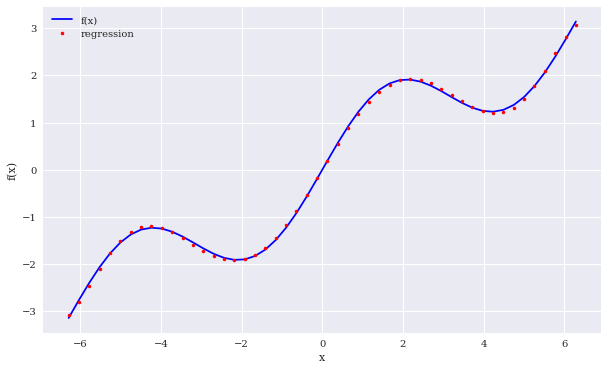

In [17]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_04.png');

#### Individual Basis Functions

一般来说，当你选择更好的基函数组时，可以得到更好的回归结果，例如利用对函数的认识进行近似值计算。在这种情况下，单独的基函数必须通过一个矩阵方法定义（也就是使用NumPy的ndarray对象）

In [18]:
# 基函数值（矩阵）所用的ndarray对象
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1 
matrix 

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [-6.28

In [19]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]  
# least-squares regression 

In [20]:
reg.round(4)  

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [21]:
ry = np.dot(reg, matrix)  
# 函数值的回归估算

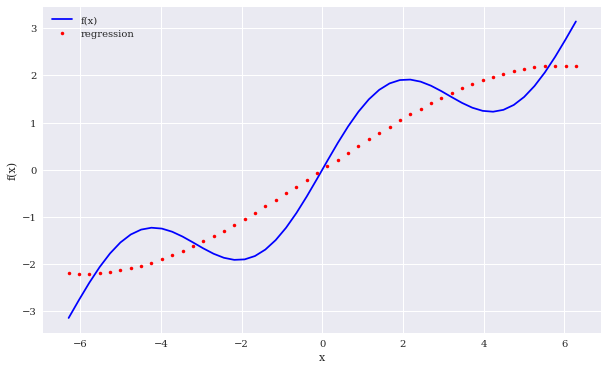

In [22]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_05.png');

In [23]:
# 个人看法：如果只是多项式的话np.polyfit就可以满足
reg2 = np.polyfit(x, f(x), deg = 3)
reg2.round(4)
# 不过注意np.polyfit默认输出的是次数由大到小的顺序

array([-0.0054,  0.    ,  0.5628,  0.    ])

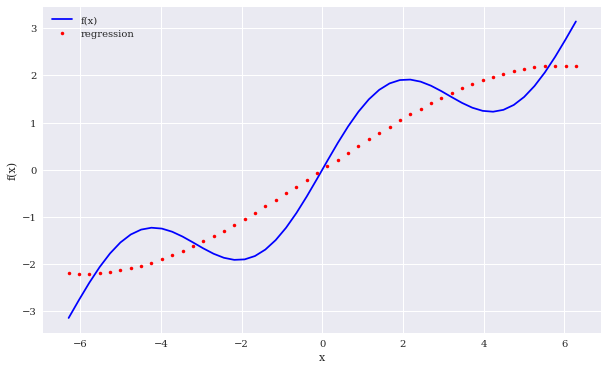

In [24]:
create_plot([x, x], [f(x), np.polyval(reg2, x)], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

In [25]:
matrix[3, :] = np.sin(x)  

In [26]:
matrix.T

array([[ 1.00000000e+00, -6.28318531e+00,  3.94784176e+01,
         2.44929360e-16],
       [ 1.00000000e+00, -6.02672876e+00,  3.63214596e+01,
         2.53654584e-01],
       [ 1.00000000e+00, -5.77027222e+00,  3.32960415e+01,
         4.90717552e-01],
       [ 1.00000000e+00, -5.51381568e+00,  3.04021633e+01,
         6.95682551e-01],
       [ 1.00000000e+00, -5.25735913e+00,  2.76398251e+01,
         8.55142763e-01],
       [ 1.00000000e+00, -5.00090259e+00,  2.50090267e+01,
         9.58667853e-01],
       [ 1.00000000e+00, -4.74444605e+00,  2.25097683e+01,
         9.99486216e-01],
       [ 1.00000000e+00, -4.48798951e+00,  2.01420498e+01,
         9.74927912e-01],
       [ 1.00000000e+00, -4.23153296e+00,  1.79058712e+01,
         8.86599306e-01],
       [ 1.00000000e+00, -3.97507642e+00,  1.58012325e+01,
         7.40277997e-01],
       [ 1.00000000e+00, -3.71861988e+00,  1.38281338e+01,
         5.45534901e-01],
       [ 1.00000000e+00, -3.46216333e+00,  1.19865749e+01,
      

In [27]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [28]:
reg.round(4)  

array([0. , 0.5, 0. , 1. ])

In [29]:
ry = np.dot(reg, matrix)

In [30]:
np.allclose(f(x), ry)  

True

In [31]:
np.mean((f(x) - ry) ** 2)  

3.345571424993955e-31

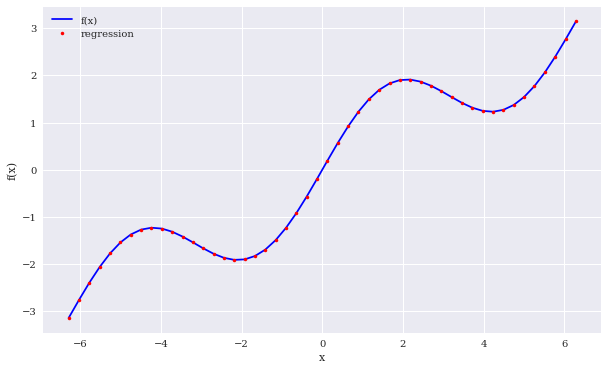

In [32]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_06.png');

#### Noisy Data

In [33]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

In [34]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)
# 回归结果比有噪声的数据点更接近原始函数。在某种意义上，回归在一定程度上平均了噪声

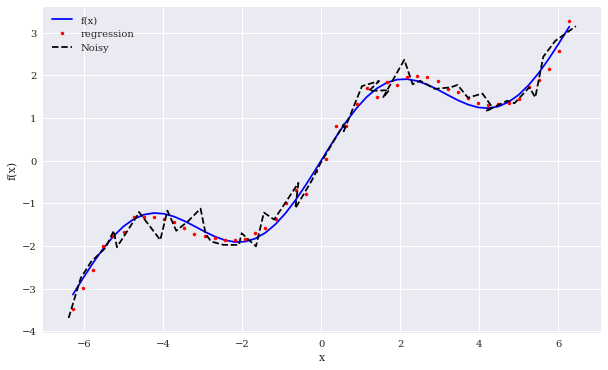

In [35]:
create_plot([x, x, xn], [f(x), ry, yn], ['b', 'r.', 'k--'],
            ['f(x)', 'regression', 'Noisy'], ['x', 'f(x)', 'yn'])
# plt.savefig('../../images/ch11/math_07.png');

#### Unsorted Data

回归的另一个重要特点是，它可以无缝地处理未排序数据。

In [36]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

In [37]:
print(xu[:10].round(2))  
print(yu[:10].round(2))  

[ 4.78 -1.52 -2.77 -5.72 -2.12 -5.67 -5.37 -2.07  5.44  2.78]
[ 1.39 -1.76 -1.75 -2.33 -1.91 -2.26 -1.89 -1.91  1.97  1.74]


In [38]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

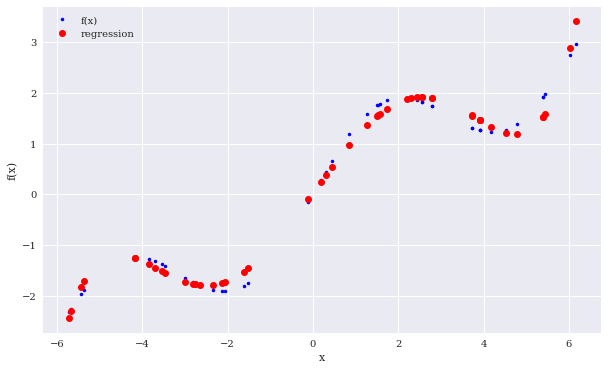

In [39]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_08.png');

#### Multiple Dimensions

最小二乘回归方法的另一个优点是，不需要太多的修改就可以用于多维的情况

In [40]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [41]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)  

In [42]:
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

In [43]:
from mpl_toolkits.mplot3d import Axes3D  

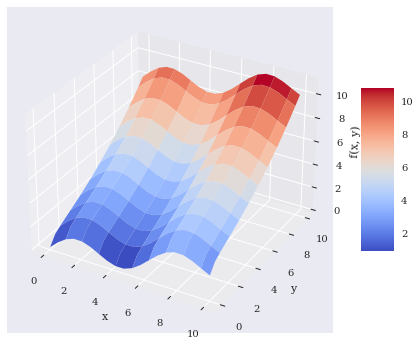

In [44]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_09.png');

In [45]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [46]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [47]:
RZ = np.dot(matrix, reg).reshape((20, 20))  

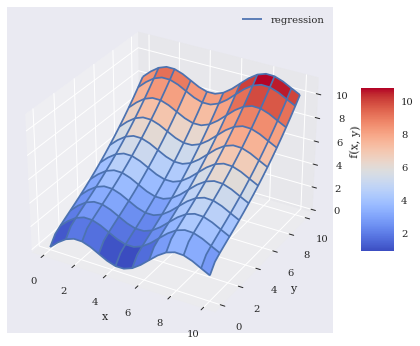

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)  
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_10.png');

### Interpolation

与回归相比，插值（例如，3次样条插值）在数学上更为复杂。它还被限制在低维度问题上。给定一组有序的观测点（按照x维排序），基本的思路是在两个相邻数据点之间进行回归，这样做不仅产生的分段插值函数完全匹配数据点，而且函数在数据点上连续可微分。连续可微分性需要至少3阶插值——也就是3次样条插值。然而，这种方法一般也适用于4次或者线性样条插值。

In [49]:
import scipy.interpolate as spi  

In [50]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [51]:
def f(x):
    return np.sin(x) + 0.5 * x

In [52]:
# 实现线性样条插值
ipo = spi.splrep(x, f(x), k=1)  

In [53]:
# 得出内插值
iy = spi.splev(x, ipo)  

In [54]:
np.allclose(f(x), iy)  

True

In [55]:
np.mean((f(x) - iy) ** 2)

0.0

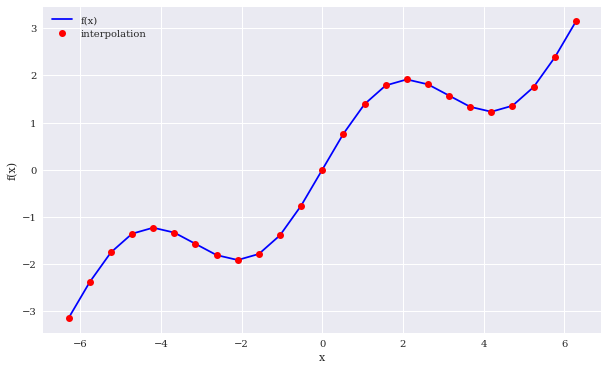

In [56]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_11.png');

如果x数据点是排序的，那么使用sci.splrep()和sci.splev()能非常简单完成插值

样条插值在金融学中往往用于估算未包含在原始观测点中的自变量数据点的因变量值

In [57]:
xd = np.linspace(1.0, 3.0, 50)  
iyd = spi.splev(xd, ipo)

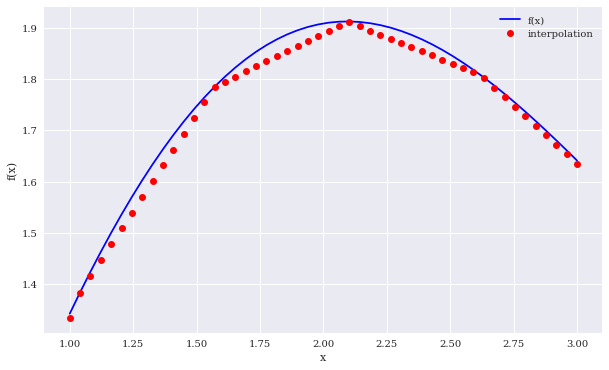

In [58]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_12.png');

插值函数确实可以线性地在两个观测点之间插值。对于某些应用，这可能不够精确。此外，很明显函数在原始数据点上不是连续可微分的——这是另一个不足

In [59]:
ipo = spi.splrep(x, f(x), k=3)  
iyd = spi.splev(xd, ipo)  

In [60]:
np.allclose(f(xd), iyd)  

False

In [61]:
np.mean((f(xd) - iyd) ** 2)  

1.1349319851436252e-08

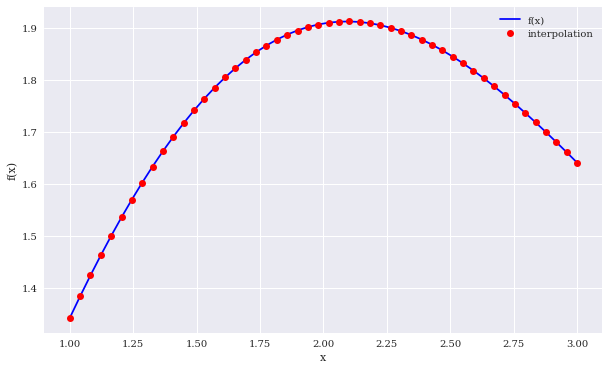

In [62]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_13.png');

在可以应用样条插值的情况下，可以期望得到比最小二乘回归方法更好的近似结果。但是要记住，必须有排序（且“无噪声”）的数据，该方法仅限于低维度问题。样条插值的计算要求也更高，在某些用例中可能导致花费的时间比回归方法的长得多

## Convex Optimization
在金融学和经济学中，凸优化起着重要的作用。这方面的例子包括根据市场数据校准期权定价模型，或者代理人效用函数的优化。

In [63]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [64]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

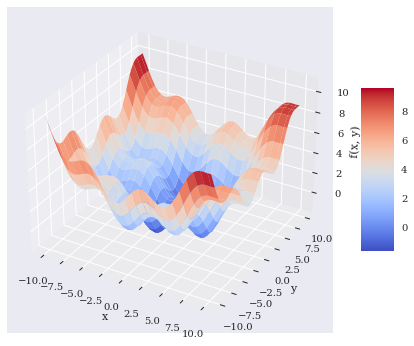

In [65]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_14.png');

这个函数有多个局部极小值。从这个特定的图形表现中无法真正确认全局最小值是否存在

### Global Optimization
全局优化

In [66]:
import scipy.optimize as sco  

In [67]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

In [68]:
output = True
# 暴力优化
# 参数化的过程相当粗糙：对两个输入参数均使用5的步长
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [69]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [70]:
opt1

array([-1.4, -1.4])

In [71]:
fm(opt1)

-1.7748994599769203

### Local Optimization

接下来的局部凸优化需要用到全局优化的结果。sco.fmin()函数的输入是需要最小化的函数和起始参数值。可选的参数值是输入参数宽容度和函数值宽容度，以及最大迭代及函数调用次数。局部优化可进一步改善结果

In [72]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)  

-1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [73]:
opt2

array([-1.42702972, -1.42876755])

In [74]:
fm(opt2)

-1.7757246992239009

在许多凸优化问题中，建议在局部优化之前进行全局优化。主要原因是局部凸优化算法很容易陷入某个局部最小值（所谓的“盆地跳跃”（basin hopping）），而忽略“更好”的局部最小值和全局最小值。

In [75]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained Optimization

有约束优化

到目前为止，我们只考虑了无约束优化问题，但是许多类型的经济学或者金融学优化问题都有一个或者多个约束条件。这些约束可能采取等式或者不等式等正规形式

我们使用scipy.optimize.minimize()函数来解决上述问题。除了需要最小化的函数之外，这个函数还将公式、不等式（以字典对象列表的形式）和参数范围（以元组对象元组的形式）作为输入。

In [76]:
import math

In [77]:
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))
# 为了最大化预期效用而最小化的函数

In [78]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  
# 字典对象形式的不等式约束

In [79]:
bnds = ((0, 1000), (0, 1000))  
# 参数边界值（选择为足够宽）

In [80]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)  
# 约束优化

In [81]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [77]:
result['x']
# 最优参数值（即最优投资组合）  

array([8.02547122, 1.97452878])

In [78]:
-result['fun']  
# 函数的最小负数值是最优解决方案值

9.700883611487832

In [79]:
np.dot(result['x'], [10, 10])  
# 预算约束是有约束力的；投入所有财富

99.99999999999999

## Integration

在估值和期权定价时，积分是一个重要的数学工具。这来源于一个事实：衍生物的风险中立价值一般可以用风险中立（鞅）测度下的预期折现收益来表示。这一预期在离散情况下是个总和，在连续情况下是一个积分。scipy.integrate子库提供了数值积分所用的不同函数。

In [82]:
import scipy.integrate as sci

In [83]:
def f(x):
    return np.sin(x) + 0.5 * x

In [84]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b)  
Iy = f(Ix)  #  <4>

In [85]:
from matplotlib.patches import Polygon

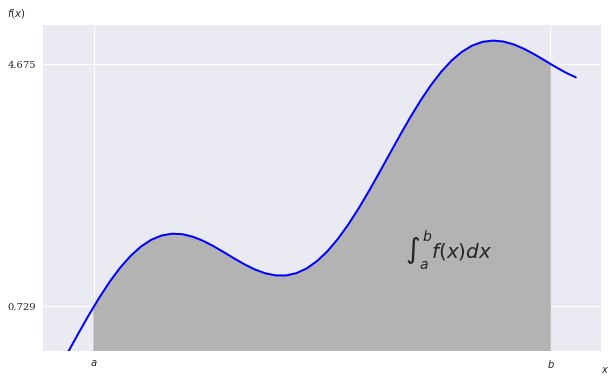

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);
# plt.savefig('../../images/ch11/math_15.png');

### Numerical Integration

scipy.integrate子库包含一组精选的函数，可以计算给定上下限和数学函数下的数值积分。这些函数的例子包含用于固定高斯求积的sci.fixed_quad()、用于自适应求积的sci.quad()和用于龙贝格积分的sci.romberg()

还有一些积分函数以输入列表或者包含函数值和输入值的ndarray对象作为输入。这种函数的例子包括使用梯形法则的sci.trapz()和实现辛普森法则的sci.simps()

In [87]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [88]:
sci.quad(f, a, b)[0]

24.374754718086752

In [89]:
sci.romberg(f, a, b)

24.374754718086713

In [90]:
xi = np.linspace(0.5, 9.5, 25)

In [91]:
sci.trapz(f(xi), xi)

24.352733271544516

In [92]:
sci.simps(f(xi), xi)

24.37496418455075

### Integration by Simulation
通过蒙特卡洛模拟（参见第12章）的期权和衍生物估值基于这样一个认识——可以通过模拟来求取积分。为此，在积分区间内取I个随机的x值，并计算每个随机x值处的积分函数值。加总所有函数值并求其平均值，就可以得到积分区间的平均函数值。将该值乘以积分区间长度，可以得出估算的积分值

In [91]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a  # b-a区间中的随机x
    print(np.mean(f(x)) * (b - a))  # 矩形估算

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic Computation

本节介绍符号计算，这种计算在许多金融领域中很有用处。我们通常使用专用于符号计算的SymPy库

### Basics

SymPy引入了新的对象类。最基本的是Symbol类

In [93]:
import sympy as sy

In [94]:
x = sy.Symbol('x')  
y = sy.Symbol('y')  

In [95]:
type(x)

sympy.core.symbol.Symbol

In [96]:
sy.sqrt(x)  

sqrt(x)

In [97]:
3 + sy.sqrt(x) - 4 ** 2  

sqrt(x) - 13

In [98]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2  

In [99]:
sy.simplify(f)  

1.5*x**2 + 4.5

SymPy为数学表达式提供了3个基本的渲染器：
- 基于LaTeX的渲染器
- 基于Unicode的渲染器
- 基于ASCII的渲染器。

例如，若只在Jupyter Notebook环境（基于HTML）中工作时，LaTex渲染通常是好（在视觉上引人入胜）的选择。

In [100]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [101]:
print(sy.pretty(f))

2      
1.5*x  + 4.5


In [102]:
print(sy.pretty(sy.sqrt(x) + 0.5))

___      
\/ x  + 0.5


In [103]:
%time pi_str = str(sy.N(sy.pi, 400000))  

Wall time: 722 ms


In [104]:
pi_str[:42]  

'3.1415926535897932384626433832795028841971'

In [105]:
pi_str[-40:]  

'8245672736856312185020980470362464176199'

In [109]:
%time pi_str.find('999999')  

Wall time: 999 µs


763

### Equations

SymPy的长处之一是解方程，例如x2–1=0这样的形式。一般来说，SymPy假定你寻找的是使指定表达式为0的方程解。因此，x2–1=3这样的方程可能必须改写，才能获得想要的结果。当然，SymPy可以处理更复杂的表达式，如x3 + 0.5 x2−1 = 0。最后，它还能解决涉及虚数的问题，如求x2 + y2 =0的解

In [110]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [111]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [112]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [113]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### Integration and Differentiation

SymPy的另一个长处是积分和微分。下面，回到用于数值和模拟积分的示例函数，并既求出符号解，也求出精确的数值解

In [114]:
# 积分区间的符号对象
a, b = sy.symbols('a b')  

In [115]:
# 定义Integral对象并以漂亮的格式打印
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))  

In [116]:
print(sy.pretty(I))  

b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [117]:
# 得出反导数并以漂亮的格式打印
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)  

In [118]:
print(sy.pretty(int_func))  

2         
0.25*x  - cos(x)


In [119]:
# 区间两端的反导数值，方法为.subs()和.evalf()函数
Fb = int_func.subs(x, 9.5).evalf()  
Fa = int_func.subs(x, 0.5).evalf()  

In [120]:
Fb - Fa  

24.3747547180867

In [121]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))  

In [122]:
print(sy.pretty(int_func_limits))  

2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [123]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()  

24.3747547180868

In [124]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))  

24.3747547180867

### Differentiation

In [125]:
int_func.diff()

0.5*x + sin(x)

In [126]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)  

In [127]:
del_x = sy.diff(f, x)  
del_x  

0.1*x + cos(x)

In [128]:
del_y = sy.diff(f, y)  
del_y  

0.1*y + cos(y)

In [129]:
xo = sy.nsolve(del_x, -1.5)  
xo  

-1.42755177876459

In [130]:
yo = sy.nsolve(del_y, -1.5)  
yo  

-1.42755177876459

In [131]:
f.subs({x : xo, y : yo}).evalf()  

-1.77572565314742

In [132]:
xo = sy.nsolve(del_x, 1.5)
xo

1.74632928225285

In [133]:
yo = sy.nsolve(del_y, 1.5)  
yo

1.74632928225285

In [134]:
f.subs({x : xo, y : yo}).evalf()  

2.27423381055640